# Importar librerias

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Cargar el dataset

In [81]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [83]:
df = pd.read_csv(url)

In [88]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [90]:
headers = ['Age', 'Gender', 'BMI', 'No_of_children', 'Smoker', 'Region', 'Charges']
df.columns = headers
df.head(10)

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


### Reemplazar los '?' con valores 'NaN'.


In [93]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


### Informacion del dataset

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


### cambios en el dataset



In [103]:
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(["NaN", "nan", "?"], np.nan, inplace=True)
df["Smoker"].replace(np.nan, is_smoker, inplace=True)

mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(["NaN", "nan", "?"], np.nan, inplace=True)
df["Age"].replace(np.nan, mean_age, inplace=True)

df["Age"] = df["Age"].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


C:\Users\pablo\AppData\Local\Temp\ipykernel_42188\3585209100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Smoker"].replace(["NaN", "nan", "?"], np.nan, inplace=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_42188\3585209100.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [105]:
df.head()
df['Charges'] = df['Charges'].round(2)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


# Análisis Exploratorio de los datos 


(0.0, 66902.85800000001)

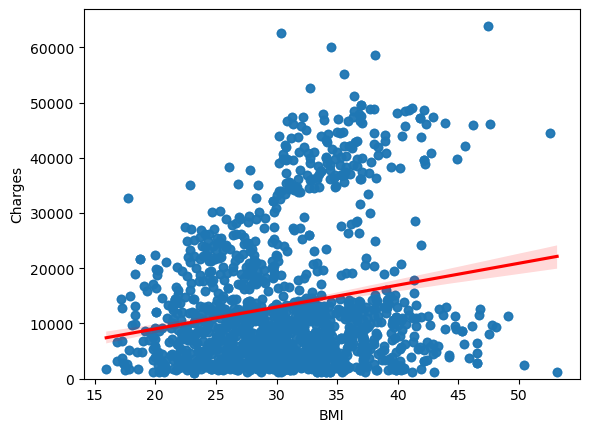

In [108]:
sns.regplot(x = 'BMI', y= 'Charges', data = df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

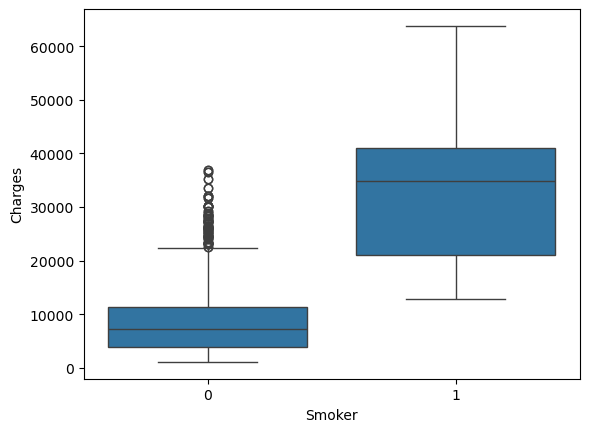

In [110]:
sns.boxplot(x='Smoker', y='Charges', data=df)

In [113]:
corr = df.corr()
corr

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Regresion lineal smoker vs charges



In [116]:
X = df[['Smoker']]
y = df['Charges']
lr = LinearRegression()
lr.fit(X, y)
lr.predict(X)
predict = lr.score(X,y)
print(f'Ser fumador predice tus gastos en un: {round(predict * 100, 2)}%')


Ser fumador predice tus gastos en un: 62.27%


# Regresion lineal todas las caracteristicas vs charges

In [121]:
Z = df[['Age','Gender','BMI','No_of_children','Region']]
y = df['Charges']
lr = LinearRegression()
lr.fit(Z, y)
lr.predict(Z)
predict = lr.score(Z,y)
print(f'Todas las caracteristicas (menos ser fumador) predicen tus gastos en un: {round(predict * 100, 2)}%')


Todas las caracteristicas (menos ser fumador) predicen tus gastos en un: 12.45%


## Creacion de un pipeline con  `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` para crear un modelo que prediga el valor  `charges` usando todos los demas atributos. 


In [124]:
Input = [('polynomial', PolynomialFeatures(degree=2)), ('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, y)
predict = pipe.predict(Z)
r2 = r2_score(y, predict)
r2

0.13706112655312364

# Refinamiento del modelo con la division de datos


In [127]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=1)

# Regresion de Ridge 

In [139]:
rr = Ridge(alpha=0.1)
rr.fit(Z, y)
y_hat = rr.predict(Z)
print(r2_score(y, y_hat))

0.12451411731201645


### Transformación polinómica a los parámetros de entrenamiento con grado 2.



In [142]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.transform(X_test)
rr.fit(x_train_pr, y_train)
y_hat = rr.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.13472799189594908


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
